In [1]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

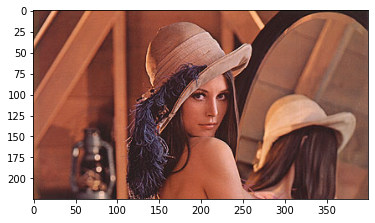

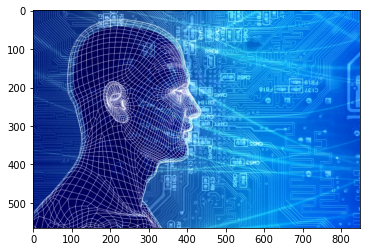

In [2]:
#Image 1
image1 = cv2.imread('lena.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# show image
plt.figure()
plt.axis("on")
plt.imshow(image1)

# Image 2
image2 = cv2.imread('imgproc.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# show image
plt.figure()
plt.axis("on")
plt.imshow(image2)

In [3]:
image1 = image1.reshape((image1.shape[0] * image1.shape[1], 3))
image2 = image2.reshape((image2.shape[0] * image2.shape[1], 3))

In [4]:
# cluster the pixel intensities
clt1 = KMeans(n_clusters = 6)
clt1.fit(image1)

KMeans(n_clusters=6)

In [5]:
clt2 = KMeans(n_clusters = 5)
clt2.fit(image2)

KMeans(n_clusters=5)

In [6]:
def centroid_histogram(clt):
# grab the number of different clusters and create a histogram
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
# normalize the histogram
	hist = hist.astype("float")
	hist /= hist.sum()
	return hist

In [7]:
def plot_colors(hist, centroids):
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
	for (percent, color) in zip(hist, centroids):
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	return bar

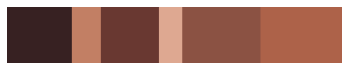

In [8]:
hist = centroid_histogram(clt1)
bar = plot_colors(hist, clt1.cluster_centers_)

# show color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

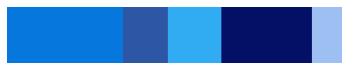

In [9]:
hist = centroid_histogram(clt2)
bar = plot_colors(hist, clt2.cluster_centers_)

# show color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()